고급프로그래밍 team E

양인지 : 데이터 크롤링, 데이터 분석부분 진행

#1. 갤럭시 리뷰 분석

In [3]:
# 필요한 라이브러리 import
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##(1) 데이터 불러오기

In [4]:
# 데이터 불러오기
df1 = pd.read_csv("galaxy_category_token.csv")
df1 = df1.drop(df1.columns[[0]], axis=1)
df1.head(3)

,type,category,review,star,token_review
0,갤럭시S21,만족도,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5,"['자급', '제', '처음', '사보는데', '그', '전', '에는', '대리점..."
1,갤럭시S21,만족도,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5,"['아이폰', '7', '를', '쓰다', '배터리', '가', '빨리', '닳기'..."
2,갤럭시S21,만족도,믿고 쓰는 회사 제품입니다. 티비\n믿고 쓰는 회사 제품입니다.\n티비 광고 보고 ...,5,"['믿고', '쓰는', '회사', '제품', '입니다', '티비', '\n', '믿..."


##(2) 데이터 전처리

In [5]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 448 kB 33.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
# 정규표현식 적용(혹시모르니깐 한번더 적용)
import re

def apply_regular_expression(review):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  
    result = hangul.sub('', review)  
    return result

In [7]:

# 명사 형태소 추출
from konlpy.tag import Okt
from collections import Counter

In [8]:

okt = Okt() 
#첫행 시험삼아 추출
nouns = okt.nouns(apply_regular_expression(df1['token_review'][0]))
nouns

['자급',
 '제',
 '처음',
 '그',
 '전',
 '대리점',
 '호갱',
 '금제',
 '서서',
 '나름',
 '통신사',
 '해텍',
 '도',
 '별로',
 '자급',
 '제',
 '폰',
 '알',
 '요',
 '금제',
 '이득',
 '인',
 '것',
 '기존',
 '폰',
 '자급',
 '제',
 '처음',
 '그',
 '전',
 '대리점',
 '호갱',
 '금제',
 '서서',
 '나름',
 '통신사',
 '해텍',
 '도',
 '별로',
 '자급',
 '제',
 '폰',
 '알',
 '요',
 '금제',
 '이득',
 '인',
 '것',
 '기존',
 '폰',
 '할부',
 '금',
 '갤력시',
 '구매',
 '배터리',
 '금방',
 '달',
 '사진',
 '도',
 '아이폰',
 '살',
 '이유',
 '이제',
 '아이폰',
 '이',
 '사진',
 '보정',
 '고민',
 '삼성',
 '이',
 '일',
 '저',
 '매달',
 '마다',
 '요금',
 '알뜰',
 '요',
 '금제',
 '조합',
 '데이터',
 '무제한',
 '름',
 '화',
 '무제한',
 '달',
 '원',
 '호갱',
 '자급',
 '제로',
 '전',
 '카드',
 '사',
 '할인',
 '지해',
 '구매',
 '한번',
 '돈',
 '내',
 '흠',
 '이',
 '장기',
 '적',
 '봄때',
 '자급',
 '제',
 '이득',
 '진짜',
 '제',
 '가산',
 '거',
 '보고',
 '친',
 '구들',
 '도',
 '얼른']

In [9]:
#전체 corpus에 적용
corpus = "".join(df1['token_review'].tolist())
corpus

# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['자급', '제', '처음', '그', '전', '대리점', '호갱', '금제', '서서', '나름', '통신사', '해텍', '도', '별로', '자급', '제', '폰', '알', '요', '금제', '이득', '인', '것', '기존', '폰', '자급', '제', '처음', '그', '전', '대리점', '호갱', '금제', '서서', '나름', '통신사', '해텍', '도', '별로', '자급', '제', '폰', '알', '요', '금제', '이득', '인', '것', '기존', '폰', '할부', '금', '갤력시', '구매', '배터리', '금방', '달', '사진', '도', '아이폰', '살', '이유', '이제', '아이폰', '이', '사진', '보정', '고민', '삼성', '이', '일', '저', '매달', '마다', '요금', '알뜰', '요', '금제', '조합', '데이터', '무제한', '름', '화', '무제한', '달', '원', '호갱', '자급', '제로', '전', '카드', '사', '할인', '지해', '구매', '한번', '돈', '내', '흠', '이', '장기', '적', '봄때', '자급', '제', '이득', '진짜', '제', '가산', '거', '보고', '친', '구들', '도', '얼른', '아이폰', '를', '배터리', '시작', '점', '발열', '충전기', '문제', '등', '핸드폰', '아이폰', '이', '안드로이드', '제공', '서비스', '를', '제공', '경우', '아이폰', '를', '배터리', '시작', '점', '발열', '충전기', '문제', '등', '핸드폰', '아이폰', '이', '안드로이드', '제공', '서비스', '를', '제공', '경우', '다시', '이용', '안드로이드', '갤럭시', '제품', '기대', '지난', '주', '토요일', '그때', '쯤', '주문', '배송', '예정일', '은', '일', '발송', '이', '일', '도착', '

In [10]:
#빈도 탐색
counter = Counter(nouns)
counter.most_common(10)

[('도', 3042),
 ('이', 2880),
 ('최고', 1912),
 ('배송', 1881),
 ('폰', 1536),
 ('구매', 1194),
 ('은', 1137),
 ('사용', 985),
 ('로', 933),
 ('제', 720)]

In [11]:
# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('최고', 1912),
 ('배송', 1881),
 ('구매', 1194),
 ('사용', 985),
 ('자급', 714),
 ('사은', 608),
 ('가격', 548),
 ('색상', 492),
 ('발열', 462),
 ('핸드폰', 439)]

In [12]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()




###(2-1) BOW 생성

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(token_review):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', token_review)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df1['token_review'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [14]:
# 단어 : 총 등장

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 1,
 '가격': 548,
 '가기': 4,
 '가까이': 13,
 '가끔': 17,
 '가능': 8,
 '가득': 2,
 '가로': 37,
 '가루': 6,
 '가면': 2,
 '가법': 4,
 '가산': 4,
 '가성': 42,
 '가스': 2,
 '가요': 15,
 '가운데': 4,
 '가입': 32,
 '가장': 55,
 '가족': 32,
 '가족선물': 10,
 '가지': 26,
 '가짜': 3,
 '가폰': 4,
 '가품': 4,
 '가형': 1,
 '각각': 1,
 '각도': 5,
 '간다': 4,
 '간단': 2,
 '간만': 3,
 '간소': 2,
 '간지': 5,
 '갈수록': 4,
 '감겨': 12,
 '감기': 3,
 '감당': 5,
 '감동': 14,
 '감사': 20,
 '감상': 2,
 '감성': 5,
 '감수': 3,
 '감안': 4,
 '감전': 3,
 '감탄': 14,
 '감흥': 3,
 '갑자기': 34,
 '강력': 9,
 '강점': 4,
 '강제': 2,
 '강추': 7,
 '강추저': 3,
 '강화': 24,
 '강화유리': 12,
 '개럭시': 3,
 '개봉': 24,
 '개선': 16,
 '개성': 2,
 '개시': 4,
 '개월': 35,
 '개이득': 2,
 '개인': 19,
 '개통': 80,
 '갤럭': 5,
 '갤럭시': 372,
 '갤력시': 4,
 '갤탭': 8,
 '걀럭시': 3,
 '거격': 1,
 '거구': 2,
 '거기': 6,
 '거꾸로': 4,
 '거나': 3,
 '거래': 11,
 '거렸': 1,
 '거리': 2,
 '거부': 1,
 '거사': 4,
 '거의': 29,
 '거인': 1,
 '거저': 2,
 '거지': 1,
 '거치': 4,
 '걱정': 171,
 '건가': 9,
 '건데맘': 1,
 '건전지': 12,
 '건줄': 4,
 '걸작': 1,
 '검색': 34,
 '검은색': 22,
 '검정색': 5,
 '검증': 1,
 '게다가': 12,
 '게임': 86,
 '겔럭시

###(2-2) TF-IDF 적용 

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [16]:
print(tf_idf_vect.shape)

(3293, 2068)


In [17]:
#벡터, 단어 
vect.vocabulary_

{'자급': 1466,
 '처음': 1726,
 '대리점': 375,
 '호갱': 2021,
 '금제': 229,
 '서서': 904,
 '나름': 275,
 '통신사': 1852,
 '해텍': 2000,
 '별로': 717,
 '이득': 1384,
 '기존': 257,
 '할부': 1986,
 '갤력시': 64,
 '구매': 176,
 '배터리': 678,
 '금방': 223,
 '사진': 844,
 '아이폰': 1096,
 '이유': 1408,
 '이제': 1411,
 '보정': 733,
 '고민': 131,
 '삼성': 859,
 '매달': 534,
 '마다': 509,
 '요금': 1287,
 '알뜰': 1119,
 '조합': 1616,
 '데이터': 418,
 '무제한': 603,
 '제로': 1590,
 '카드': 1789,
 '할인': 1987,
 '지해': 1691,
 '한번': 1978,
 '장기': 1496,
 '봄때': 747,
 '진짜': 1701,
 '가산': 11,
 '보고': 720,
 '구들': 173,
 '얼른': 1167,
 '시작': 1028,
 '발열': 655,
 '충전기': 1778,
 '문제': 614,
 '핸드폰': 2002,
 '안드로이드': 1108,
 '제공': 1585,
 '서비스': 903,
 '경우': 111,
 '다시': 335,
 '이용': 1406,
 '갤럭시': 63,
 '제품': 1603,
 '기대': 240,
 '지난': 1675,
 '토요일': 1847,
 '그때': 215,
 '주문': 1634,
 '배송': 674,
 '예정일': 1241,
 '발송': 654,
 '도착': 431,
 '하루': 1968,
 '성품': 931,
 '케이스': 1807,
 '상자': 874,
 '유심': 1351,
 '도구': 421,
 '설명': 920,
 '케이블': 1806,
 '액정': 1131,
 '보호': 740,
 '필름': 1951,
 '설정': 922,
 '이동': 1382,
 '순간': 986

In [18]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{1466: '자급', 1726: '처음', 375: '대리점', 2021: '호갱', 229: '금제', 904: '서서', 275: '나름', 1852: '통신사', 2000:...


##(3) 감성분류 - Logistic Regression

x =  리뷰

y = 긍부정 라벨값

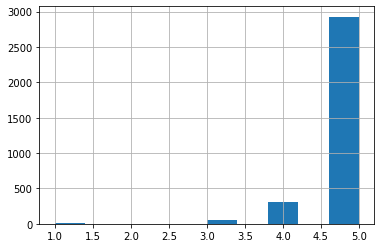

In [19]:
df1['star'].hist()
#5점에 주로 분포
#4,5점 -> 긍정 리뷰
#1,2,3점 -> 부정 리뷰

In [20]:
def rating_to_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
df1['y'] = df1['star'].apply(lambda x: rating_to_label(x))

In [21]:
df1['y'].value_counts()

1    3237
0      56
Name: y, dtype: int64

In [22]:
#Training set / Test set 나누기
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df1['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
#Logistic Regression 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression()
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [24]:
#분류 결과 평가
# classification result for test set

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9893778452200304
0.9893617021276596
1.0
0.9946524064171123


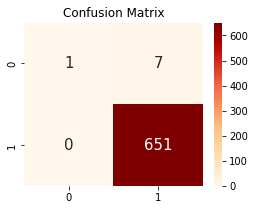

In [25]:
# confusion matrix : 클래스 불균형 발생
#모델이 지나치게 긍정으로만 예측
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#샘플링 1:1 재조정
df1['y'].value_counts()

1    3237
0      56
Name: y, dtype: int64

In [27]:
positive_random_idx = df1[df1['y']==1].sample(56, random_state=12).index.tolist()
negative_random_idx = df1[df1['y']==0].sample(56, random_state=12).index.tolist()

In [28]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df1['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [29]:
#모델 재학습
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [30]:
# classification result for test set

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.75
0.6
0.9
0.7200000000000001


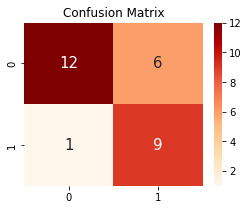

In [31]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

##(4) 긍, 부정 키워드 추출

In [32]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.5009230656543102, 1752),
 (0.6228955052061531, 674),
 (0.5328680564990358, 1927),
 (0.4919437059003568, 511),
 (0.47460937719053176, 459),
 (0.42577936888012863, 176),
 (0.3567166305344101, 795),
 (0.3275667014959102, 620),
 (0.3109563279225111, 2060),
 (0.2987292525993173, 1133),
 (0.29843499922259903, 1844),
 (0.2942485620199457, 889),
 (0.2900412723019892, 1788),
 (0.2861603856652148, 1958),
 (0.28266149812533214, 639),
 (0.2762951381945364, 344),
 (0.2749089616252855, 1959),
 (0.26129650625929446, 131),
 (0.25539559271958606, 1148),
 (0.25305369802160504, 187),
 (0.24544682094400647, 1951),
 (0.23381790455251514, 1533),
 (0.22329424326392525, 366),
 (0.22284786823365393, 229),
 (0.2149363016207189, 14),
 (0.2084671167940479, 1939),
 (0.20452252401928436, 926),
 (0.20297606918202624, 1030),
 (0.2027474130997005, 1530),
 (0.195764362356754, 431),
 (0.19470896326479775, 1681),
 (0.1945027312095921, 1864),
 (0.19285137105442018, 375),
 (0.18979771368390447, 699),
 (0.18294992103040

In [33]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{1466: '자급',
 1726: '처음',
 375: '대리점',
 2021: '호갱',
 229: '금제',
 904: '서서',
 275: '나름',
 1852: '통신사',
 2000: '해텍',
 717: '별로',
 1384: '이득',
 257: '기존',
 1986: '할부',
 64: '갤력시',
 176: '구매',
 678: '배터리',
 223: '금방',
 844: '사진',
 1096: '아이폰',
 1408: '이유',
 1411: '이제',
 733: '보정',
 131: '고민',
 859: '삼성',
 534: '매달',
 509: '마다',
 1287: '요금',
 1119: '알뜰',
 1616: '조합',
 418: '데이터',
 603: '무제한',
 1590: '제로',
 1789: '카드',
 1987: '할인',
 1691: '지해',
 1978: '한번',
 1496: '장기',
 747: '봄때',
 1701: '진짜',
 11: '가산',
 720: '보고',
 173: '구들',
 1167: '얼른',
 1028: '시작',
 655: '발열',
 1778: '충전기',
 614: '문제',
 2002: '핸드폰',
 1108: '안드로이드',
 1585: '제공',
 903: '서비스',
 111: '경우',
 335: '다시',
 1406: '이용',
 63: '갤럭시',
 1603: '제품',
 240: '기대',
 1675: '지난',
 1847: '토요일',
 215: '그때',
 1634: '주문',
 674: '배송',
 1241: '예정일',
 654: '발송',
 431: '도착',
 1968: '하루',
 931: '성품',
 1807: '케이스',
 874: '상자',
 1351: '유심',
 421: '도구',
 920: '설명',
 1806: '케이블',
 1131: '액정',
 740: '보호',
 1951: '필름',
 922: '설정',
 1382: '이동',
 986: '순간'

In [34]:
##긍정 키워드 단어 추출
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

최고 1.5009230656543102
배송 0.6228955052061531
품질 0.5328680564990358
마음 0.4919437059003568
디자인 0.47460937719053176
구매 0.42577936888012863
블랙 0.3567166305344101
물품 0.3275667014959102
휴대폰 0.3109563279225111
약간 0.2987292525993173
테스트 0.29843499922259903
생각 0.2942485620199457
친환경 0.2900412723019892
핑크 0.2861603856652148
바이올렛 0.28266149812533214
다행 0.2762951381945364
핑크색 0.2749089616252855
고민 0.26129650625929446
어머니 0.25539559271958606
구입 0.25305369802160504


In [35]:
##부정 키워드 단어 추출
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

보통 -1.6904799492193017
조금 -0.8022115685100157
번호 -0.5666669681460692
교환 -0.5192587354400617
급제 -0.5003504864178717
발열 -0.49433005445516465
팬텀 -0.46993304227892047
센터 -0.46862007574825976
충전기 -0.44875038621111296
문제 -0.41321178255854407
별로 -0.4108632651699236
대박 -0.40151336898709705
잘못 -0.39052928998331005
최악 -0.34392526600231277
이상 -0.323205645677892
보상 -0.3163627000271635
판매 -0.3146020488769597
기준 -0.3133706161795312
배터리 -0.30790454262478567
기존 -0.3055286429925798


##(5) 갤럭시 리뷰 분석 결론
키워드를 분석해보면, 긍정리뷰에서는 배송, 품질, 디자인등의 단어가 주로 나왔다는 것을 알 수 있다. 반면, 부정리뷰에서는 발열, 센터, 충전기 등의 단어가 주로 나왔다는 것을 알 수 있다. 즉, 사람들은 갤럭시의 배송, 품질, 디자인 관련해서는 만족하지만 발열과 센터, 충전기에 대해서는 불만족하고 있다는 것을 알 수 있다.

#2. 아이폰 리뷰 분석

##(1) 데이터 불러오기

In [36]:
df2 = pd.read_csv("iphone_category_token.csv")
df2 = df2.drop("Unnamed: 0", axis=1)
df2 = df2.drop("Unnamed: 0.1", axis=1)
df2.head(3)

,type,category,review,star,token_review
0,아이폰12프로,만족도,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,5,"['아이폰', '을', '사고', '배송', '받은', '뒤', '며칠', '사용'..."
1,아이폰12프로,만족도,기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로...,5,"['기변', '예약', '을', '하고', '대', '기', '타', '다가', '..."
2,아이폰12프로,만족도,아이폰 프로 12 실버 구매자 입니다^^기다리고 기다리던 제품을 빠르게 받아 볼 수...,5,"['아이폰', '프로', '12', '실버', '구매', '자', '입니다', '기..."


##(2) 데이터 전처리

In [37]:
okt = Okt() 
#첫행 시험삼아 추출
nouns = okt.nouns(apply_regular_expression(df2['token_review'][0]))
nouns

['아이폰',
 '사고',
 '배송',
 '뒤',
 '며칠',
 '사용',
 '후',
 '리뷰',
 '작성',
 '이제',
 '후기',
 '를',
 '구매',
 '계기',
 '사전예약',
 '은',
 '커녕',
 '출시',
 '이후',
 '재고',
 '사람',
 '보고',
 '이번',
 '시리즈',
 '사',
 '아이폰',
 '사고',
 '배송',
 '뒤',
 '며칠',
 '사용',
 '후',
 '리뷰',
 '작성',
 '이제',
 '후기',
 '를',
 '구매',
 '계기',
 '사전예약',
 '은',
 '커녕',
 '출시',
 '이후',
 '재고',
 '사람',
 '보고',
 '이번',
 '시리즈',
 '건',
 '포기',
 '생각',
 '카드',
 '행사',
 '나',
 '적립금',
 '하나',
 '제',
 '가격',
 '건',
 '핸드폰',
 '이',
 '서치',
 '것',
 '이',
 '네이버',
 '애플',
 '공식',
 '판매점',
 '공식',
 '설명',
 '마음',
 '이',
 '여러',
 '방법',
 '가격',
 '도',
 '십만원',
 '정도',
 '살',
 '수',
 '것',
 '이',
 '가장',
 '재고',
 '제',
 '사려',
 '고',
 '때',
 '모든',
 '색상',
 '이',
 '품절',
 '사전예약',
 '도',
 '조금',
 '더',
 '생각',
 '매일',
 '재고',
 '확인',
 '것',
 '오전',
 '시',
 '시',
 '쯤',
 '한번',
 '물량',
 '오후',
 '시',
 '쯤',
 '또',
 '한번',
 '그',
 '파랑',
 '실버',
 '골드',
 '퍼블',
 '만',
 '재고',
 '안',
 '며칠',
 '더',
 '지금',
 '은',
 '모든',
 '상품',
 '이',
 '품절',
 '이',
 '구매',
 '수',
 '것',
 '색상',
 '퍼시픽',
 '블루',
 '출시',
 '소식',
 '때',
 '부터',
 '이번',
 '핸드폰',
 '은',
 '이',
 '거',
 '생각',
 '막상',
 '

In [38]:
#전체 corpus에 적용
corpus = "".join(df2['token_review'].tolist())
corpus

# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['아이폰', '사고', '배송', '뒤', '며칠', '사용', '후', '리뷰', '작성', '이제', '후기', '를', '구매', '계기', '사전예약', '은', '커녕', '출시', '이후', '재고', '사람', '보고', '이번', '시리즈', '사', '아이폰', '사고', '배송', '뒤', '며칠', '사용', '후', '리뷰', '작성', '이제', '후기', '를', '구매', '계기', '사전예약', '은', '커녕', '출시', '이후', '재고', '사람', '보고', '이번', '시리즈', '건', '포기', '생각', '카드', '행사', '나', '적립금', '하나', '제', '가격', '건', '핸드폰', '이', '서치', '것', '이', '네이버', '애플', '공식', '판매점', '공식', '설명', '마음', '이', '여러', '방법', '가격', '도', '십만원', '정도', '살', '수', '것', '이', '가장', '재고', '제', '사려', '고', '때', '모든', '색상', '이', '품절', '사전예약', '도', '조금', '더', '생각', '매일', '재고', '확인', '것', '오전', '시', '시', '쯤', '한번', '물량', '오후', '시', '쯤', '또', '한번', '그', '파랑', '실버', '골드', '퍼블', '만', '재고', '안', '며칠', '더', '지금', '은', '모든', '상품', '이', '품절', '이', '구매', '수', '것', '색상', '퍼시픽', '블루', '출시', '소식', '때', '부터', '이번', '핸드폰', '은', '이', '거', '생각', '막상', '구매', '시간', '이', '좀', '도중', '보', '실버', '구', '그것', '도', '은', '다시', '블루', '로', '구매', '구매', '질리', '면', '고민', '직접', '순간', '생각', '이', '영상', '사진', '전부', '

In [39]:
#빈도 탐색
counter = Counter(nouns)
counter.most_common(10)

[('도', 681),
 ('이', 667),
 ('배송', 595),
 ('구매', 303),
 ('은', 301),
 ('아이폰', 299),
 ('실버', 228),
 ('로', 216),
 ('사용', 186),
 ('것', 176)]

In [40]:
# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('배송', 595),
 ('구매', 303),
 ('아이폰', 299),
 ('실버', 228),
 ('사용', 186),
 ('색상', 172),
 ('최고', 172),
 ('주문', 171),
 ('할인', 127),
 ('제품', 126)]

###(2-1) BOW 생성

In [41]:
#word-count
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df2['token_review'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [42]:
# 단어 : 총 등장 횟수

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 12,
 '가격': 70,
 '가까이': 4,
 '가득': 4,
 '가로': 16,
 '가보': 3,
 '가성': 3,
 '가입': 10,
 '가장': 25,
 '가죽': 2,
 '가지': 2,
 '각도': 8,
 '각오': 2,
 '각종': 2,
 '각지': 6,
 '간만': 1,
 '간혹': 2,
 '갈등': 2,
 '감사': 3,
 '감탄': 4,
 '감흥': 2,
 '갑자기': 14,
 '강국': 4,
 '강릉': 8,
 '강원도': 4,
 '강추': 4,
 '개간': 2,
 '개봉': 16,
 '개시': 4,
 '개월': 9,
 '개인': 6,
 '개통': 25,
 '갤럭시': 8,
 '거가': 2,
 '거기': 2,
 '거나': 4,
 '거리': 6,
 '거의': 36,
 '걱정': 28,
 '건가': 2,
 '건데': 4,
 '검사': 2,
 '검색': 16,
 '검정': 6,
 '게임': 2,
 '겟했어': 2,
 '겨우': 7,
 '결과': 6,
 '결정': 24,
 '결제': 21,
 '결함': 4,
 '경우': 3,
 '경유': 2,
 '경쟁': 1,
 '계기': 8,
 '계산': 4,
 '계속': 56,
 '계열': 2,
 '계해': 8,
 '고객': 6,
 '고급': 21,
 '고려': 2,
 '고민': 100,
 '고생': 6,
 '고스트': 4,
 '고요': 2,
 '고장': 10,
 '고정': 3,
 '골드': 125,
 '골드바': 8,
 '공식': 34,
 '공홈': 32,
 '과감': 2,
 '과정': 4,
 '관계자': 1,
 '광고': 4,
 '괜춘': 4,
 '교체': 14,
 '교환': 30,
 '구매': 303,
 '구멍': 4,
 '구원': 2,
 '구입': 40,
 '구한': 4,
 '국내': 4,
 '군포': 11,
 '굿굿': 5,
 '굿굿굿': 4,
 '굿굿숫': 2,
 '그거': 6,
 '그것': 10,
 '그날': 7,
 '그냥': 44,
 '그다음': 4,
 '그닥': 2,
 '그대로': 7

In [43]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 12,  70,   4,   4,  16,   3,   3,  10,  25,   2,   2,   8,   2,
         2,   6,   1,   2,   2,   3,   4,   2,  14,   4,   8,   4,   4,
         2,  16,   4,   9,   6,  25,   8,   2,   2,   4,   6,  36,  28,
         2,   4,   2,  16,   6,   2,   2,   7,   6,  24,  21,   4,   3,
         2,   1,   8,   4,  56,   2,   8,   6,  21,   2, 100,   6,   4,
         2,  10,   3, 125,   8,  34,  32,   2,   4,   1,   4,   4,  14,
        30, 303,   4,   2,  40,   4,   4,  11,   5,   4,   2,   6,  10,
         7,  44,   4,   2,   7,   1,  14,  19,   8,   1,   4,   7,   4,
         8,   8,   4,   2,   6,   4,   8,   3,  17,   1,  20,   6,   4,
         8,   1,  25,   8,   4,   4,   2,   4,  11,   2,   3,   1,   2,
         6,   4,   1,   3,   6,   3,   2,   6,  10,   2,   3,   4, 103,
         8,   4,   2,  18,  12,  54,  26,   4,   4,  22,   1,  39,  15,
         4,  24,   5,   2,  15,   2,   8,   8,  25,   2,   5,  12,   1,
         6,   1,   8,   3,  10,   2,  10,   4,   4,   6,   1,   

###(2-2) TF-IDF 적용 

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [45]:
print(tf_idf_vect.shape)

(724, 930)


In [46]:
#벡터, 단어 
vect.vocabulary_

{'가가': 0,
 '가격': 1,
 '가까이': 2,
 '가득': 3,
 '가로': 4,
 '가보': 5,
 '가성': 6,
 '가입': 7,
 '가장': 8,
 '가죽': 9,
 '가지': 10,
 '각도': 11,
 '각오': 12,
 '각종': 13,
 '각지': 14,
 '간만': 15,
 '간혹': 16,
 '갈등': 17,
 '감사': 18,
 '감탄': 19,
 '감흥': 20,
 '갑자기': 21,
 '강국': 22,
 '강릉': 23,
 '강원도': 24,
 '강추': 25,
 '개간': 26,
 '개봉': 27,
 '개시': 28,
 '개월': 29,
 '개인': 30,
 '개통': 31,
 '갤럭시': 32,
 '거가': 33,
 '거기': 34,
 '거나': 35,
 '거리': 36,
 '거의': 37,
 '걱정': 38,
 '건가': 39,
 '건데': 40,
 '검사': 41,
 '검색': 42,
 '검정': 43,
 '게임': 44,
 '겟했어': 45,
 '겨우': 46,
 '결과': 47,
 '결정': 48,
 '결제': 49,
 '결함': 50,
 '경우': 51,
 '경유': 52,
 '경쟁': 53,
 '계기': 54,
 '계산': 55,
 '계속': 56,
 '계열': 57,
 '계해': 58,
 '고객': 59,
 '고급': 60,
 '고려': 61,
 '고민': 62,
 '고생': 63,
 '고스트': 64,
 '고요': 65,
 '고장': 66,
 '고정': 67,
 '골드': 68,
 '골드바': 69,
 '공식': 70,
 '공홈': 71,
 '과감': 72,
 '과정': 73,
 '관계자': 74,
 '광고': 75,
 '괜춘': 76,
 '교체': 77,
 '교환': 78,
 '구매': 79,
 '구멍': 80,
 '구원': 81,
 '구입': 82,
 '구한': 83,
 '국내': 84,
 '군포': 85,
 '굿굿': 86,
 '굿굿굿': 87,
 '굿굿숫': 88,
 '그거': 89,
 '그것': 90,

In [47]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{479: '아이폰', 355: '사고', 308: '배송', 259: '며칠', 365: '사용', 228: '리뷰', 653: '작성', 616: '이제', 923: '후기',...


##(3) 감성분류 - Logistic Regression

x =  리뷰

y = 긍부정 라벨값

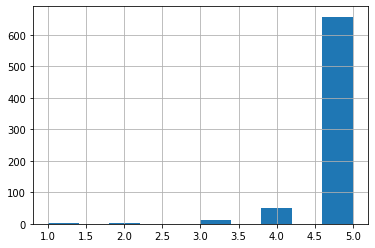

In [48]:
df2['star'].hist()
#5점에 주로 분포
#4,5점 -> 긍정 리뷰
#1,2,3점 -> 부정 리뷰

In [49]:
#target value 생성
df2['y'] = df2['star'].apply(lambda x: rating_to_label(x))

In [50]:
df2["y"].value_counts()

1    708
0     16
Name: y, dtype: int64

In [51]:
#Training set / Test set 나누기
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df2['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [52]:
#Logistic Regression 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr_iphone = LogisticRegression(random_state = 0)
lr_iphone.fit(x_train, y_train)

# predict in test set
y_pred = lr_iphone.predict(x_test)

In [53]:
#분류 결과 평가
# classification result for test set

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.981651376146789
0.981651376146789
1.0
0.9907407407407407


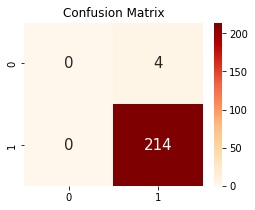

In [54]:
# confusion matrix : 클래스 불균형 발생
#모델이 지나치게 긍정으로만 예측
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#샘플링 1:1 재조정
df2['y'].value_counts()

1    708
0     16
Name: y, dtype: int64

In [56]:
positive_random_idx = df2[df2['y']==1].sample(16, random_state=12).index.tolist()
negative_random_idx = df2[df2['y']==0].sample(16, random_state=12).index.tolist()

In [57]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df2['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [58]:
#모델 재학습
lr_iphone_re = LogisticRegression(random_state = 0)
lr_iphone_re.fit(x_train, y_train)
y_pred = lr_iphone_re.predict(x_test)

In [59]:
# classification result for test set

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5
0.2
1.0
0.33333333333333337


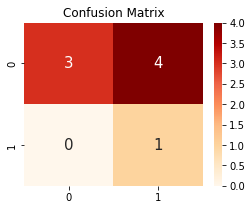

In [60]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

##(4) 긍, 부정 키워드 추출

In [61]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr_iphone_re.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr_iphone_re.coef_[0])), reverse = False)
coef_pos_index

[(0.5661897351206026, 398),
 (0.28767775732885476, 475),
 (0.2482576018062023, 208),
 (0.23629940727193088, 848),
 (0.22638100650376053, 235),
 (0.21536674741836603, 264),
 (0.20782568577643265, 263),
 (0.19111987819714643, 782),
 (0.19111987819714643, 130),
 (0.1774800917907198, 56),
 (0.1751072445029069, 720),
 (0.17419077435311414, 399),
 (0.17400828949377709, 66),
 (0.17290185807372993, 396),
 (0.16382001239543859, 469),
 (0.16084557745799252, 271),
 (0.16046006768826584, 759),
 (0.1543277978266119, 666),
 (0.1405995047017111, 829),
 (0.13669225413731828, 480),
 (0.13511716714369743, 858),
 (0.13488005325898733, 693),
 (0.13434983406559753, 479),
 (0.13360365449799547, 337),
 (0.12365131815143933, 819),
 (0.1200340837368615, 408),
 (0.11533387346996683, 884),
 (0.11213678483723633, 600),
 (0.11213678483723633, 176),
 (0.11213678483723633, 116),
 (0.10330721737922555, 250),
 (0.10290829969926812, 470),
 (0.09892454081853876, 439),
 (0.09795450068231101, 365),
 (0.0928702825078508, 9

In [62]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{0: '가가',
 1: '가격',
 2: '가까이',
 3: '가득',
 4: '가로',
 5: '가보',
 6: '가성',
 7: '가입',
 8: '가장',
 9: '가죽',
 10: '가지',
 11: '각도',
 12: '각오',
 13: '각종',
 14: '각지',
 15: '간만',
 16: '간혹',
 17: '갈등',
 18: '감사',
 19: '감탄',
 20: '감흥',
 21: '갑자기',
 22: '강국',
 23: '강릉',
 24: '강원도',
 25: '강추',
 26: '개간',
 27: '개봉',
 28: '개시',
 29: '개월',
 30: '개인',
 31: '개통',
 32: '갤럭시',
 33: '거가',
 34: '거기',
 35: '거나',
 36: '거리',
 37: '거의',
 38: '걱정',
 39: '건가',
 40: '건데',
 41: '검사',
 42: '검색',
 43: '검정',
 44: '게임',
 45: '겟했어',
 46: '겨우',
 47: '결과',
 48: '결정',
 49: '결제',
 50: '결함',
 51: '경우',
 52: '경유',
 53: '경쟁',
 54: '계기',
 55: '계산',
 56: '계속',
 57: '계열',
 58: '계해',
 59: '고객',
 60: '고급',
 61: '고려',
 62: '고민',
 63: '고생',
 64: '고스트',
 65: '고요',
 66: '고장',
 67: '고정',
 68: '골드',
 69: '골드바',
 70: '공식',
 71: '공홈',
 72: '과감',
 73: '과정',
 74: '관계자',
 75: '광고',
 76: '괜춘',
 77: '교체',
 78: '교환',
 79: '구매',
 80: '구멍',
 81: '구원',
 82: '구입',
 83: '구한',
 84: '국내',
 85: '군포',
 86: '굿굿',
 87: '굿굿굿',
 88: '굿굿숫',
 89: '그거',
 90: '그것',

In [63]:
##긍정 키워드 단어 추출
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

색상 0.5661897351206026
아유 0.28767775732885476
딸아이 0.2482576018062023
파이트 0.23629940727193088
마음 0.22638100650376053
모두 0.21536674741836603
모델 0.20782568577643265
총알 0.19111987819714643
나름 0.19111987819714643
계속 0.1774800917907198
존예 0.1751072445029069
생각 0.17419077435311414
고장 0.17400828949377709
색깔 0.17290185807372993
아내 0.16382001239543859
목요일 0.16084557745799252
진짜 0.16046006768826584
저녁 0.1543277978266119
토요일 0.1405995047017111
아주 0.13669225413731828


In [64]:
##부정 키워드 단어 추출
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

이뽀 -0.5237882145587303
강릉 -0.46849935864525294
불량 -0.40440019096411733
다행 -0.3723708325696381
확인 -0.2989310018784677
군포 -0.29764204218762713
통운 -0.2970325331407339
뽑기 -0.2804540529641709
마지막 -0.24217376432937193
강원도 -0.23424967932262647
전남 -0.23424967932262647
주소지 -0.23424967932262647
여유 -0.22918628060043306
가입 -0.2285401056042836
재부팅 -0.2285401056042836
안해 -0.2238621931487142
액정 -0.22334267697355376
오늘 -0.22312949147929712
환불 -0.2229344231871066
모서리 -0.22248973391338014


##(5) 아이폰 리뷰 분석 결론
키워드를 분석해보면, 긍정리뷰에서는 색상, 모델, 존예 등의 단어가 주로 나왔다는 것을 알 수 있다. 반면, 부정리뷰에서는 불량, 뽑기, 특정 주소명 등의 단어가 주로 나왔다는 것을 알 수 있다. 즉, 사람들은 아이폰의 디자인 관련해서는 만족하지만 배송관련 문제, 품질의 일관성에 대해서는 불만족하고 있다는 것을 알 수 있다.

#3. 결론

갤럭시를 구매한 사람들의 리뷰를 보면 배송, 품질에 대해 만족하고 있지만, 발열, 충전기 등 배터리와 관련해서는 불만족하고 있다는 것을 추측할 수 있다. 반면, 아이폰은 디자인과 관련하여 만족하고 있는 사람들이 대부분이지만 배송, 품질과 관련해서는 불만족하고 있다는 것을 알 수 있다. 

놀랍게도 갤럭시의 장점이 아이폰의 단점이 되는 것을 알 수 있었다. 이를 통해 갤럭시와 아이폰의 유의미한 경쟁구도를 확인할 수 있었다.
갤럭시를 더욱더 홍보하기 위해서는 이러한 점을 이용하면 더욱더 삼성 측에 유리한 경쟁구도가 형성될것이다. 

####reference

1. https://c11.kr/ut8e
2. https://c11.kr/ut8f
3. https://c11.kr/ut8g
4. https://c11.kr/ut8h
5. https://c11.kr/ut8i
6. https://c11.kr/ut8c
7. https://c11.kr/ut8d 
